# Artificial Neural Network
> This is an implementation of an Artifitial Neural Network from scratch only using NumPy


An Artificial Neuron is actually derived as a concept and inspired by human brain.
Each neuron does like the following in the below image:
<br><br>
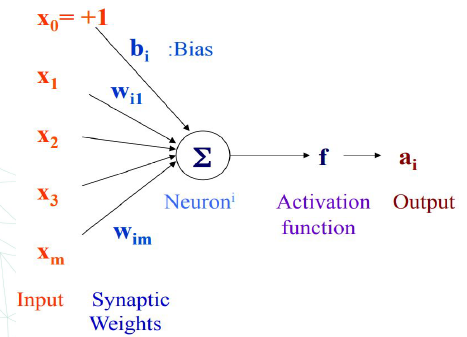
<br>
The output is computed from the follwing function in image below:
<br><br>
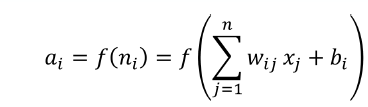

In [1]:
import numpy as np

In [99]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

In [91]:
def sigmoid_dash(x):
  return sigmoid(x)*(1-sigmoid(x))

In [105]:
X=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
Y=np.array([[0],[1],[1],[0]])

In [106]:
w1=np.random.rand(3,5)
w2=np.random.rand(6,1)

In [107]:
def forward_prob(x,w1,w2,predict=False):
  a1=np.matmul(x,w1)
  z1=sigmoid(a1)
  b=np.ones((len(z1),1))
  z1=np.concatenate((b,z1),axis=1)
  a2=np.matmul(z1,w2)
  z2=sigmoid(a2)
  if predict:
    return z2
  return a1,z1,a2,z2

In [108]:
def back_prob(a2,z0,z1,z2,y):
  delta2=z2-y
  Delta2=np.matmul(z1.T,delta2)
  delta1=delta2.dot(w2[1:,:].T)*sigmoid_dash(a1)
  Delta1=np.matmul(z0.T,delta1)
  return delta2,Delta1,Delta2

In [109]:
lr=0.1
epochs=15000
m=len(X)

In [110]:
for epoch in range(epochs):
  a1,z1,a2,z2=forward_prob(X,w1,w2)
  delta2,Delta1,Delta2=back_prob(a2,X,z1,z2,Y)
  w1-=lr*(1/m)*Delta1
  w2-=lr*(1/m)*Delta2


In [128]:
z3=forward_prob(X,w1,w2,True)
print("Percentages:")
for i in z3: print(float("%.4f"%i))
print("-"*20)
print("Predictions")
for i in np.round(z3): print(int(i))
print("-"*20)
print("Actual")
for i in Y: print(int(i))

Percentages:
0.0095
0.994
0.9923
0.0063
--------------------
Predictions
0
1
1
0
--------------------
Actual
0
1
1
0


<ipython-input-128-bf4a680e1e39>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in z3: print(float("%.4f"%i))
<ipython-input-128-bf4a680e1e39>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in np.round(z3): print(int(i))
<ipython-input-128-bf4a680e1e39>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  for i in Y: print(int(i))
